In [3]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.8/653.8 kB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 3.9 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

In [2]:
citi_ts = pd.read_csv("../downloads/C.csv", parse_dates=['Date'])
citi_ts

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-22,65.839996,65.919998,64.639999,64.660004,53.633648,12564900
1,2019-05-23,63.820000,63.939999,63.080002,63.900002,53.003246,15042200
2,2019-05-24,64.290001,64.709999,64.059998,64.389999,53.409683,9715400
3,2019-05-28,64.089996,64.449997,63.759998,63.790001,52.912006,14727400
4,2019-05-29,63.150002,63.830002,62.720001,63.709999,52.845654,13836300
...,...,...,...,...,...,...,...
1255,2024-05-16,64.099998,64.470001,63.430000,64.139999,64.139999,11682200
1256,2024-05-17,64.379997,64.550003,63.900002,64.070000,64.070000,8418400
1257,2024-05-20,64.070000,64.250000,62.919998,63.160000,63.160000,11792100
1258,2024-05-21,63.259998,64.879997,63.200001,64.739998,64.739998,11190200


In [3]:
citi_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   Open       1260 non-null   float64       
 2   High       1260 non-null   float64       
 3   Low        1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Adj Close  1260 non-null   float64       
 6   Volume     1260 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [4]:
citi_ts = citi_ts.rename(columns={"Adj Close": "Adj_Close"})
citi_ts

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2019-05-22,65.839996,65.919998,64.639999,64.660004,53.633648,12564900
1,2019-05-23,63.820000,63.939999,63.080002,63.900002,53.003246,15042200
2,2019-05-24,64.290001,64.709999,64.059998,64.389999,53.409683,9715400
3,2019-05-28,64.089996,64.449997,63.759998,63.790001,52.912006,14727400
4,2019-05-29,63.150002,63.830002,62.720001,63.709999,52.845654,13836300
...,...,...,...,...,...,...,...
1255,2024-05-16,64.099998,64.470001,63.430000,64.139999,64.139999,11682200
1256,2024-05-17,64.379997,64.550003,63.900002,64.070000,64.070000,8418400
1257,2024-05-20,64.070000,64.250000,62.919998,63.160000,63.160000,11792100
1258,2024-05-21,63.259998,64.879997,63.200001,64.739998,64.739998,11190200


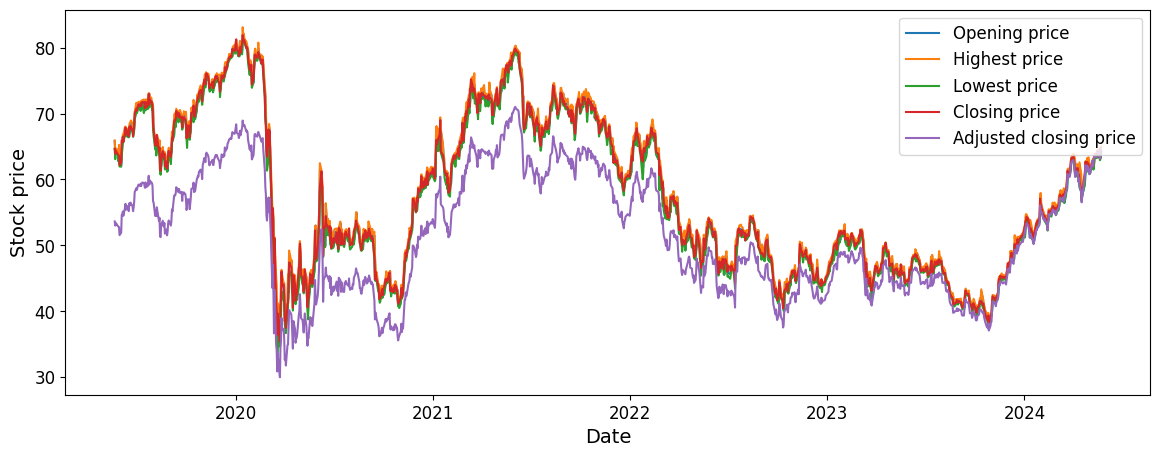

In [5]:
plt.figure(figsize=(14,5))

plt.plot(citi_ts.Date, citi_ts.Open, label="Opening price")
plt.plot(citi_ts.Date, citi_ts.High, label="Highest price")
plt.plot(citi_ts.Date, citi_ts.Low, label="Lowest price")
plt.plot(citi_ts.Date, citi_ts.Close, label="Closing price")
plt.plot(citi_ts.Date, citi_ts.Adj_Close, label="Adjusted closing price")

plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock price", fontsize=14)

plt.legend(fontsize=12, loc=1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

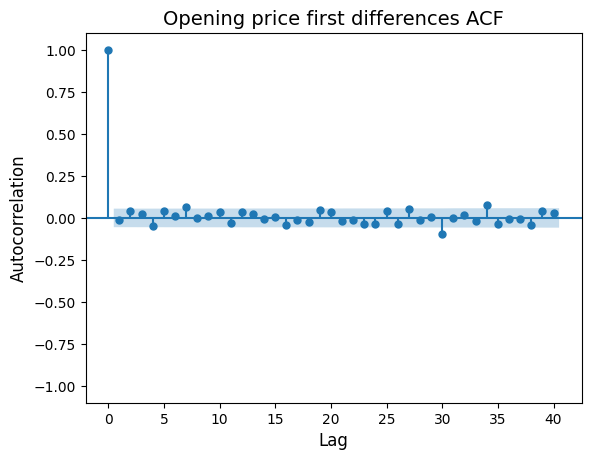

In [6]:
sm.graphics.tsa.plot_acf(citi_ts.Open.diff().values[1:],
                               lags=40)

plt.title('Opening price first differences ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

<Figure size 1400x500 with 0 Axes>

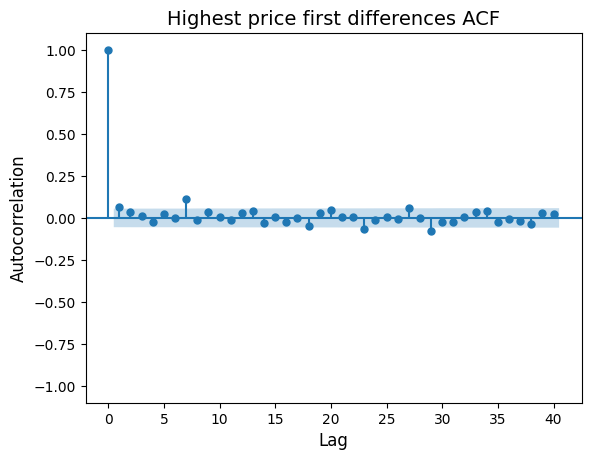

In [7]:
plt.figure(figsize=(14,5))

sm.graphics.tsa.plot_acf(citi_ts.High.diff().values[1:],
                               lags=40)

plt.title('Highest price first differences ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

<Figure size 1400x500 with 0 Axes>

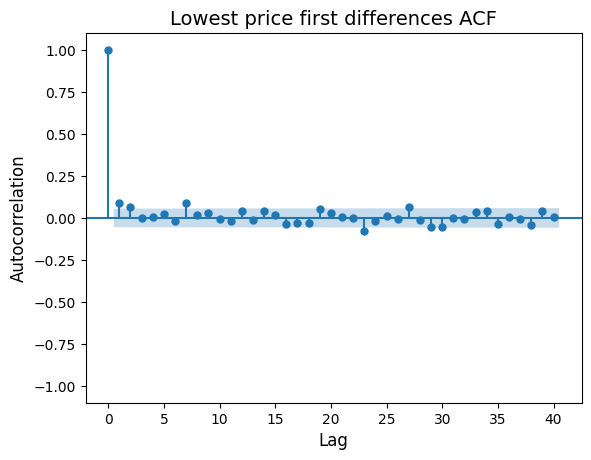

In [8]:
plt.figure(figsize=(14,5))

sm.graphics.tsa.plot_acf(citi_ts.Low.diff().values[1:],
                               lags=40)

plt.title('Lowest price first differences ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

<Figure size 1400x500 with 0 Axes>

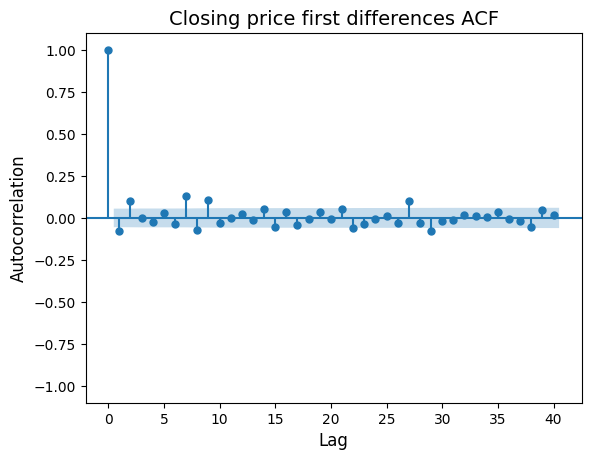

In [9]:
plt.figure(figsize=(14,5))

sm.graphics.tsa.plot_acf(citi_ts.Close.diff().values[1:],
                               lags=40)

plt.title('Closing price first differences ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

<Figure size 1400x500 with 0 Axes>

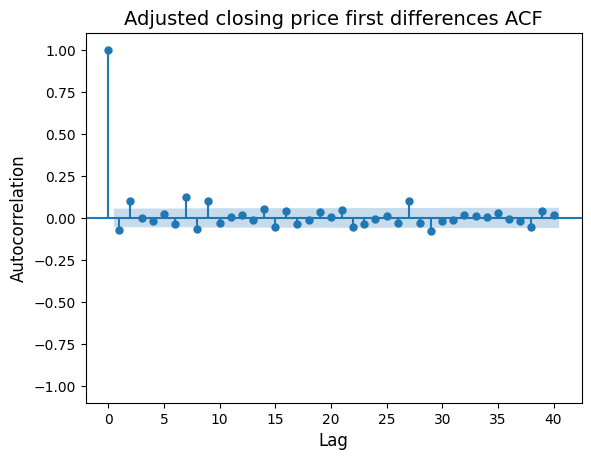

In [10]:
plt.figure(figsize=(14,5))

sm.graphics.tsa.plot_acf(citi_ts.Adj_Close.diff().values[1:],
                               lags=40)

plt.title('Adjusted closing price first differences ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

In [11]:
citi_train = citi_ts.iloc[:-10]
citi_test = citi_ts[-10:]

In [12]:
n_splits = 10
kfold = TimeSeriesSplit(n_splits,test_size=10)

In [13]:
rmse_Gaussian = np.zeros((n_splits,5))

i = 0
for train_index, test_index in kfold.split(citi_train):
    citi_tt = citi_train.loc[train_index]
    citi_ho = citi_train.loc[test_index]
    
    j = 0
    for price in ['Open','High','Low','Close','Adj_Close']:
        tt_avg = citi_tt[price].mean()

        rmse_Gaussian[i,j] = np.sqrt(mean_squared_error(citi_ho[price].values,
                                    tt_avg*np.ones(10)))
        j = j + 1
    
    i = i + 1

avg_rmse_Gaussian = np.mean(rmse_Gaussian,axis=0)

In [14]:
rmse_naive = np.zeros((n_splits,5))

i = 0
for train_index, test_index in kfold.split(citi_train):
    citi_tt = citi_train.loc[train_index]
    citi_ho = citi_train.loc[test_index]
    
    j = 0
    for price in ['Open','High','Low','Close','Adj_Close']:
        tt_naive = citi_tt[price].values[-1]

        rmse_naive[i,j] = np.sqrt(mean_squared_error(citi_ho[price].values,
                                    tt_naive*np.ones(10)))
        j = j + 1
    
    i = i + 1

avg_rmse_naive = np.mean(rmse_naive,axis=0)

In [15]:
rmse_exp_smooth = np.zeros((n_splits,5))

i = 0
for train_index, test_index in kfold.split(citi_train):
    citi_tt = citi_train.loc[train_index]
    citi_ho = citi_train.loc[test_index]
    
    j = 0
    for price in ['Open','High','Low','Close','Adj_Close']:
        simp_exp_smooth = SimpleExpSmoothing(citi_tt[price]).fit(optimized=True)

        rmse_exp_smooth[i,j] = np.sqrt(mean_squared_error(citi_ho[price].values,
                                    simp_exp_smooth.forecast(10)))
        j = j + 1
    
    i = i + 1

avg_rmse_exp_smooth = np.mean(rmse_exp_smooth,axis=0)

In [16]:
auto_arima(citi_train.Open.values, trace=True, max_p=10, max_q=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4126.591, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4124.040, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4125.885, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4125.898, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4122.049, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4128.040, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.604 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
auto_arima(citi_train.High.values, trace=True, max_p=10, max_q=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3909.636, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3917.481, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3913.865, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3914.188, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3915.486, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3916.758, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3916.784, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3908.156, Time=0.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3908.338, Time=0.41 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3910.638, Time=0.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3909.042, Time=0.45 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3903.181, Time=1.23 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=3

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [18]:
auto_arima(citi_train.Low.values, trace=True, max_p=10, max_q=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3916.115, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3922.056, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3914.320, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3915.377, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3920.062, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3912.302, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3914.144, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3914.157, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3913.324, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3916.142, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3910.307, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3912.325, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=3912.149, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3912.162, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [19]:
auto_arima(citi_train.Close.values, trace=True, max_p=10, max_q=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4158.699, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4171.255, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4165.791, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4167.031, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4169.257, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4157.175, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4155.187, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4157.171, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4162.631, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4159.087, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4153.188, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4165.034, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4155.177, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=4155.173, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [20]:
auto_arima(citi_train.Adj_Close.values, trace=True, max_p=10, max_q=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3826.066, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3837.113, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3832.853, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3833.888, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3835.166, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3824.383, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3822.385, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3824.382, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3829.877, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3826.384, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3820.434, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3831.948, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3822.432, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3822.431, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [21]:
rmse_arima = np.zeros((n_splits,5))

i = 0
for train_index, test_index in kfold.split(citi_train):
    citi_tt = citi_train.loc[train_index]
    citi_ho = citi_train.loc[test_index]

    arima = ARIMA(citi_tt.Open.values, order=(0,1,0)).fit()

    rmse_arima[i,0] = np.sqrt(mean_squared_error(citi_ho.Open.values,
                                    arima.forecast(10)))

    arima = ARIMA(citi_tt.High.values, order=(4,1,3)).fit()

    rmse_arima[i,1] = np.sqrt(mean_squared_error(citi_ho.High.values,
                                    arima.forecast(10)))

    arima = ARIMA(citi_tt.Low.values, order=(2,1,0)).fit()

    rmse_arima[i,2] = np.sqrt(mean_squared_error(citi_ho.Low.values,
                                    arima.forecast(10)))

    arima = ARIMA(citi_tt.Close.values, order=(0,1,2)).fit()

    rmse_arima[i,3] = np.sqrt(mean_squared_error(citi_ho.Close.values,
                                    arima.forecast(10)))

    arima = ARIMA(citi_tt.Adj_Close.values, order=(0,1,2)).fit()

    rmse_arima[i,4] = np.sqrt(mean_squared_error(citi_ho.Adj_Close.values,
                                    arima.forecast(10)))
    
    i = i + 1

avg_rmse_arima = np.mean(rmse_arima, axis=0)

/Users/sumanaich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sumanaich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/sumanaich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sumanaich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting au

In [22]:
avg_rmse_Gaussian

array([3.75204545, 3.82696769, 3.65551402, 3.69357673, 5.30886792])

In [23]:
avg_rmse_naive

array([1.57658694, 1.55631894, 1.53451987, 1.47044908, 1.46921469])

In [24]:
avg_rmse_exp_smooth

array([1.5764516 , 1.55631894, 1.53451987, 1.48665205, 1.48448361])

In [25]:
avg_rmse_arima

array([1.57658694, 1.57746762, 1.54895031, 1.48820533, 1.48036987])